### Objetivo: Verificar funcionamiento de módulo GDAL instalado

Ref: [Instalador GDAL](https://mothergeo-py.readthedocs.io/en/latest/development/how-to/gdal-ubuntu-pkg.html)

In [1]:
# standard imports
import sys

# import OGR
from osgeo import ogr

# Define path
gdb_path = r'/home/negrete/repos/NDVI_S2_gauge/Vectores/Campos_test.shp'

# use OGR specific exceptions
ogr.UseExceptions()

# get the driver
driver = ogr.GetDriverByName("ESRI Shapefile")

# opening the FileGDB
try:
    gdb = driver.Open(gdb_path, 0)
except Exception as e:
    print(e)
    sys.exit()

# list to store layers'names
featsClassList = []

# parsing layers by index
for featsClass_idx in range(gdb.GetLayerCount()):
    featsClass = gdb.GetLayerByIndex(featsClass_idx)
    featsClassList.append(featsClass.GetName())

# sorting
featsClassList.sort()

# printing
for featsClass in featsClassList:
    print(featsClass)

# clean close
del gdb

Campos_test


Funciona correctamente

### Verificación de instalaciones de rasterio y fiona

In [2]:
import rasterio, fiona, numpy
print('Versión de raterio', rasterio.__version__,sep='\n')
print('Versión de fiona', fiona.__version__,sep='\n')
print('Versión de numpy', numpy.__version__,sep='\n')

Versión de raterio
1.3.8
Versión de fiona
1.9.4.post1
Versión de numpy
1.25.1


In [3]:
# Nuevas verificaciones de instalación
import geopandas as gpd, geoplot, matplotlib
%matplotlib inline
print('Versión de geopandas', gpd.__version__,sep='\n')
print('Versión de geoplot', geoplot.__version__,sep='\n')
print('Versión de matplotlib', matplotlib.__version__,sep='\n')

Versión de geopandas
0.13.2
Versión de geoplot
0.5.1
Versión de matplotlib
3.7.2


In [4]:
example_shp = gpd.read_file(gdb_path)
example_shp.head()

,id,geometry
0,1,"POLYGON ((-61.13111 -38.87918, -61.12089 -38.8..."
1,2,"POLYGON ((-61.12079 -38.87134, -61.13105 -38.8..."
2,3,"POLYGON ((-61.12057 -38.87138, -61.11033 -38.8..."
3,4,"POLYGON ((-61.11669 -38.85995, -61.11076 -38.8..."


<Axes: >

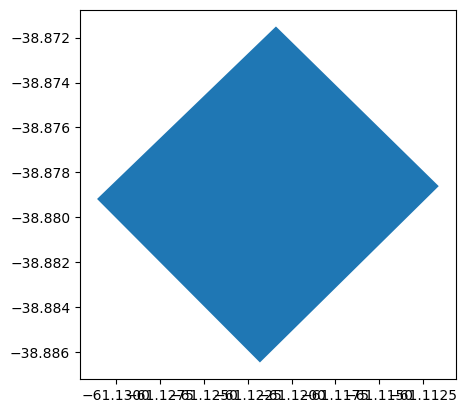

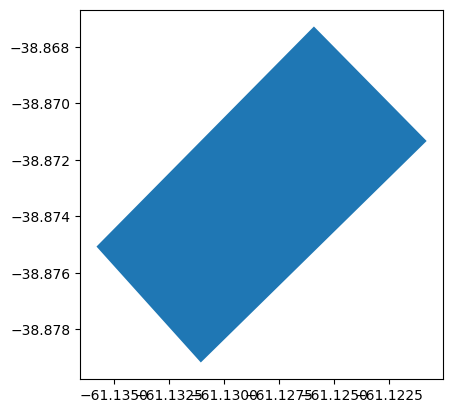

In [5]:
# Ejemplo visualización de información geográfica
example_shp[example_shp['id']==1].plot()
example_shp[example_shp['id']==2].plot()

In [6]:
example_shp.crs
example_shp["area"] = example_shp.area
example_shp["area"]

/tmp/ipykernel_10087/2562213262.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  example_shp["area"] = example_shp.area


0    0.000146
1    0.000080
2    0.000155
3    0.000079
Name: area, dtype: float64

<Axes: >

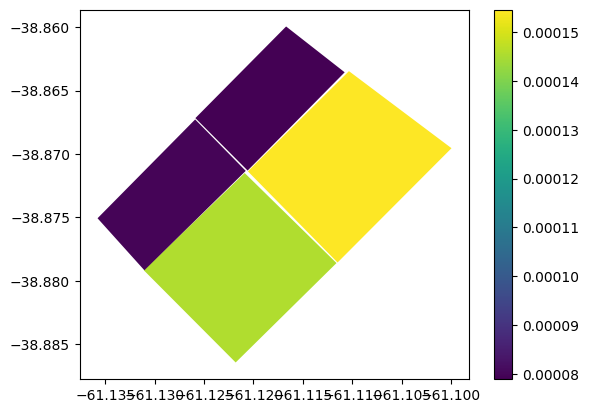

In [7]:
example_shp.plot("area", legend=True)

In [8]:
import folium, mapclassify
print('Versión de folium', folium.__version__,sep='\n')
print('Versión de mapclassify', mapclassify.__version__,sep='\n')

Versión de folium
0.14.0
Versión de mapclassify
2.6.0


In [9]:
# example_shp.explore("area", legend=False)

example_shp.explore("area", legend=False)

In [10]:
sys.path.append(r'/home/negrete/repos/NDVI_S2_gauge/utils')
import mod_searcher as ms
path_search = '/home/negrete/repos/NDVI_S2_gauge/Scripts/aux_files/search_s2.pkl'
df_search = ms.read_list(path_search)

In [11]:
display(df_search[0]) 

,@odata.mediaContentType,Id,Name,ContentType,ContentLength,OriginDate,PublicationDate,ModificationDate,Online,EvictionDate,S3Path,Checksum,ContentDate,Footprint,GeoFootprint
0,application/octet-stream,c1253c40-3176-5322-9c70-a0a575c0e56e,S2B_MSIL2A_20220304T135109_N0400_R024_T20HPB_2...,application/octet-stream,0,2022-03-04T22:22:20.540Z,2022-07-01T15:39:54.438Z,2022-07-01T15:39:54.438Z,True,,/eodata/Sentinel-2/MSI/L2A/2022/03/04/S2B_MSIL...,[],"{'Start': '2022-03-04T13:51:09.024Z', 'End': '...",geography'SRID=4326;POLYGON ((-61.847717 -38.8...,"{'type': 'Polygon', 'coordinates': [[[-61.8477..."
1,application/octet-stream,0db40101-d5be-5962-8a67-935cdf44a3d6,S2B_MSIL2A_20220307T140049_N0400_R067_T20HPB_2...,application/octet-stream,0,2022-03-07T23:14:20.269Z,2022-03-27T15:07:17.153Z,2022-03-27T15:07:17.153Z,True,,/eodata/Sentinel-2/MSI/L2A/2022/03/07/S2B_MSIL...,[],"{'Start': '2022-03-07T14:00:49.024Z', 'End': '...",geography'SRID=4326;POLYGON ((-61.006195 -38.8...,"{'type': 'Polygon', 'coordinates': [[[-61.0061..."
2,application/octet-stream,3db1829f-7309-5c51-810f-20ffc7410946,S2A_MSIL2A_20220309T135121_N0400_R024_T20HPB_2...,application/octet-stream,0,2022-03-09T21:38:02.833Z,2022-03-27T01:19:12.339Z,2022-03-27T01:19:12.339Z,True,,/eodata/Sentinel-2/MSI/L2A/2022/03/09/S2A_MSIL...,[],"{'Start': '2022-03-09T13:51:21.024Z', 'End': '...",geography'SRID=4326;POLYGON ((-60.554108 -39.6...,"{'type': 'Polygon', 'coordinates': [[[-60.5541..."


In [12]:
from shapely.geometry import shape

# gdf_0 = gpd.GeoDataFrame(df_search[0], geometry="Footprint")
# display(gdf_0)

# display(list(df_search[1]['GeoFootprint'])[0])
geo_list_1 = list(df_search[1]['GeoFootprint'])
geo_list_2 = list(df_search[1]['Footprint'])
geo_list = []
for geojson_item,wkt_item in zip(geo_list_1,geo_list_2):
    # display(geojson_item,wkt_item)
    geom_f_gjson = shape(geojson_item)
    geom_f_wkt = wkt_item.split(';')[1]
    geo_list.append(geom_f_gjson)

    # display(geom_f_gjson.wkt, geom_f_wkt)
    # print(wkt_item.split(';')[0])
# crs = 
crs = 'EPSG:' + wkt_item.split(';')[0].split('=')[1]
display(geo_list,crs)

[<POLYGON ((-61.848 -38.843, -61.831 -39.832, -60.549 -39.812, -60.583 -38.82...>,
 <POLYGON ((-61.006 -38.83, -61.848 -38.843, -61.831 -39.832, -61.301 -39.824...>,
 <POLYGON ((-61.008 -38.83, -61.848 -38.843, -61.831 -39.832, -61.303 -39.824...>]

'EPSG:4326'

In [13]:
# Genero copia de búsqueda para agregarle wkt de modo lista
gdb_wkt = df_search[0].copy()

In [14]:
# display(gdb_wkt)
gdb_wkt['wkt'] = geo_list
print('EPSG:'+wkt_item.split(';')[0].split('=')[1])
display(list(gdb_wkt['wkt']))
# gdf_0 = gpd.GeoDataFrame(gdb_wkt, geometry='wkt',crs='EPSG:'+wkt_item.split(';')[0].split('=')[1])
gdf_0 = gpd.GeoDataFrame(gdb_wkt, geometry='wkt',crs=crs)
display(gdb_wkt)

EPSG:4326


[<POLYGON ((-61.848 -38.843, -61.831 -39.832, -60.549 -39.812, -60.583 -38.82...>,
 <POLYGON ((-61.006 -38.83, -61.848 -38.843, -61.831 -39.832, -61.301 -39.824...>,
 <POLYGON ((-61.008 -38.83, -61.848 -38.843, -61.831 -39.832, -61.303 -39.824...>]

,@odata.mediaContentType,Id,Name,ContentType,ContentLength,OriginDate,PublicationDate,ModificationDate,Online,EvictionDate,S3Path,Checksum,ContentDate,Footprint,GeoFootprint,wkt
0,application/octet-stream,c1253c40-3176-5322-9c70-a0a575c0e56e,S2B_MSIL2A_20220304T135109_N0400_R024_T20HPB_2...,application/octet-stream,0,2022-03-04T22:22:20.540Z,2022-07-01T15:39:54.438Z,2022-07-01T15:39:54.438Z,True,,/eodata/Sentinel-2/MSI/L2A/2022/03/04/S2B_MSIL...,[],"{'Start': '2022-03-04T13:51:09.024Z', 'End': '...",geography'SRID=4326;POLYGON ((-61.847717 -38.8...,"{'type': 'Polygon', 'coordinates': [[[-61.8477...","POLYGON ((-61.847717 -38.84277401945, -61.8313..."
1,application/octet-stream,0db40101-d5be-5962-8a67-935cdf44a3d6,S2B_MSIL2A_20220307T140049_N0400_R067_T20HPB_2...,application/octet-stream,0,2022-03-07T23:14:20.269Z,2022-03-27T15:07:17.153Z,2022-03-27T15:07:17.153Z,True,,/eodata/Sentinel-2/MSI/L2A/2022/03/07/S2B_MSIL...,[],"{'Start': '2022-03-07T14:00:49.024Z', 'End': '...",geography'SRID=4326;POLYGON ((-61.006195 -38.8...,"{'type': 'Polygon', 'coordinates': [[[-61.0061...","POLYGON ((-61.006195 -38.829914548189, -61.847..."
2,application/octet-stream,3db1829f-7309-5c51-810f-20ffc7410946,S2A_MSIL2A_20220309T135121_N0400_R024_T20HPB_2...,application/octet-stream,0,2022-03-09T21:38:02.833Z,2022-03-27T01:19:12.339Z,2022-03-27T01:19:12.339Z,True,,/eodata/Sentinel-2/MSI/L2A/2022/03/09/S2A_MSIL...,[],"{'Start': '2022-03-09T13:51:21.024Z', 'End': '...",geography'SRID=4326;POLYGON ((-60.554108 -39.6...,"{'type': 'Polygon', 'coordinates': [[[-60.5541...","POLYGON ((-61.008057 -38.829942892569, -61.847..."


<Axes: >

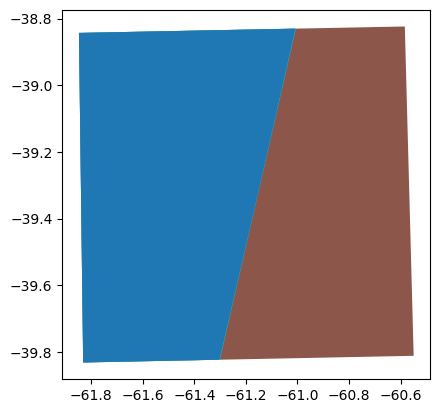

In [15]:
gdf_0.plot("Name", legend=False)

In [16]:
gdf_0.explore("Name", legend=False)

# Pendiente

Queda pendiente la conversión de geojson de cada una de las filas a wkt. Estuve revisando el módulo python *shapely* para poder manipular los datos para convertirlo a wkt -> requerimiento de geopandas.

# Hecho en las celdas anteriores

[Módulo shapely a revisar](https://shapely.readthedocs.io/en/stable/manual.html)

#  Objetivo 1

Encontrar la intersección entre ROIs de búsqueda y las escenas. Encontré que se puede aplicar el método overlay [uso de overlay](https://geopandas.org/en/stable/docs/user_guide/set_operations.html) para encontrar si una está incluída en la otra. Pero antes debería encontrar la manera computar losbordes de todas las geometrías y luego buscar qué escenas incluyen las ROIs.

Uso de indexador cx para encontrar intersecciones espaciales en geopandas. [Buscador por índice](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.cx.html#geopandas.GeoDataFrame.cx)



In [17]:
example_bound = example_shp.total_bounds
# print(example_bound, type(example_bound))
dict_bound_search = {'index': ['xmin', 'ymin', 'xmax', 'ymax']}
for coor, index in zip(example_bound, dict_bound_search['index']):
    dict_bound_search[index] = coor
    # print(dict_bound_search.keys())
    print(f'{index}: {dict_bound_search[index]}')

# Ya tengo listo el diccionario con el contorno de la búsqueda requerida para utilizarla con el método cx
gdf_0.cx[dict_bound_search['xmin']:dict_bound_search['xmax'], dict_bound_search['ymin']:dict_bound_search['ymax']]

xmin: -61.13579909111154
ymin: -38.88644989052576
xmax: -61.09993805150015
ymax: -38.85994728445276


,@odata.mediaContentType,Id,Name,ContentType,ContentLength,OriginDate,PublicationDate,ModificationDate,Online,EvictionDate,S3Path,Checksum,ContentDate,Footprint,GeoFootprint,wkt
0,application/octet-stream,c1253c40-3176-5322-9c70-a0a575c0e56e,S2B_MSIL2A_20220304T135109_N0400_R024_T20HPB_2...,application/octet-stream,0,2022-03-04T22:22:20.540Z,2022-07-01T15:39:54.438Z,2022-07-01T15:39:54.438Z,True,,/eodata/Sentinel-2/MSI/L2A/2022/03/04/S2B_MSIL...,[],"{'Start': '2022-03-04T13:51:09.024Z', 'End': '...",geography'SRID=4326;POLYGON ((-61.847717 -38.8...,"{'type': 'Polygon', 'coordinates': [[[-61.8477...","POLYGON ((-61.84772 -38.84277, -61.83136 -39.8..."
1,application/octet-stream,0db40101-d5be-5962-8a67-935cdf44a3d6,S2B_MSIL2A_20220307T140049_N0400_R067_T20HPB_2...,application/octet-stream,0,2022-03-07T23:14:20.269Z,2022-03-27T15:07:17.153Z,2022-03-27T15:07:17.153Z,True,,/eodata/Sentinel-2/MSI/L2A/2022/03/07/S2B_MSIL...,[],"{'Start': '2022-03-07T14:00:49.024Z', 'End': '...",geography'SRID=4326;POLYGON ((-61.006195 -38.8...,"{'type': 'Polygon', 'coordinates': [[[-61.0061...","POLYGON ((-61.00619 -38.82991, -61.84772 -38.8..."
2,application/octet-stream,3db1829f-7309-5c51-810f-20ffc7410946,S2A_MSIL2A_20220309T135121_N0400_R024_T20HPB_2...,application/octet-stream,0,2022-03-09T21:38:02.833Z,2022-03-27T01:19:12.339Z,2022-03-27T01:19:12.339Z,True,,/eodata/Sentinel-2/MSI/L2A/2022/03/09/S2A_MSIL...,[],"{'Start': '2022-03-09T13:51:21.024Z', 'End': '...",geography'SRID=4326;POLYGON ((-60.554108 -39.6...,"{'type': 'Polygon', 'coordinates': [[[-60.5541...","POLYGON ((-61.00806 -38.82994, -61.84772 -38.8..."


# Conclusión de objetivo 1

Encontré, increíblemente que las tres escenas se intersectan con el polígono total de búsqueda. Resta computar el área de intersección entre el área de búsqueda (el completo) y las tres escenas. Un algoritmo que me se me ocurre es el siguiente:

1. Computar el área de la búsqueda completa (no solo la de los cuatro polígonos de búsqueda sino del completo)
2. Definir geometría de búsqueda completa con los datos que obtuve en la celda de código anterior (dict_bound_search)
3. Utilizar el método overlay sobre dataset de escenas Sentinel-2 para definir nuevas áreas de intersección y medir dicha áreas. Si coinciden con el valor del área de búsqueda significa que se interseccionan totalmente, si es menos indica que el área de intersección entre la búsqueda y cada escena no coinciden totalmente.

Otro camino que puedo llegar a tomar es encontrar la manera de computar el área de intersección entre el área de búsqueda y cada una de las escenas Sentinel-2.

In [18]:
from shapely import Polygon

def polyFbound(xmin, ymin, xmax, ymax, index):
    # Creación de polígono desde (From) límites encontrados
    coords = ((xmin, ymin), (xmax,ymin), (xmax,ymax), (xmin,ymax))
    # display(box,box.area)
    return Polygon(coords)

Cómputo 1: Área de ROI de búsqueda 0.000950411006188819


<Axes: >

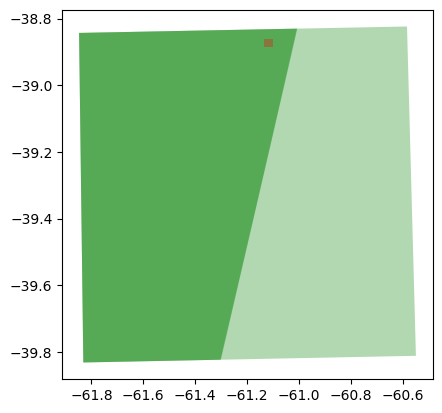

In [22]:
poly_search_shape = polyFbound(**dict_bound_search)
# Computo 1 área de ROI de búsqueda
print(f'Cómputo 1: Área de ROI de búsqueda {poly_search_shape.area}')
# poly_search_gdb = gpd.GeoDataFrame(poly_search_shape)
d = {'col1': ['ROI busqueda'], 'geometry': [poly_search_shape]}

roi_gdf = gpd.GeoDataFrame(d, crs="EPSG:4326")
# poly_search_gdb.plot(color='green', alpha=0.5)
alpha_view = 0.3
ax = gdf_0.plot(color='green', alpha=alpha_view)

roi_gdf.plot(ax=ax, color='red', alpha=alpha_view)

In [29]:
inter_shapes = gdf_0.overlay(roi_gdf, how='intersection')
# inter_shapes['inter_area'] = inter_shapes.area
print('Cálculo de intersección de área')
display(inter_shapes.area/poly_search_shape.area)
display(inter_shapes)
# inter_shapes.explore()


/tmp/ipykernel_10087/3780003643.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  display(inter_shapes.area/poly_search_shape.area)


0    1.0
1    1.0
2    1.0
dtype: float64

,@odata.mediaContentType,Id,Name,ContentType,ContentLength,OriginDate,PublicationDate,ModificationDate,Online,EvictionDate,S3Path,Checksum,ContentDate,Footprint,GeoFootprint,col1,geometry
0,application/octet-stream,c1253c40-3176-5322-9c70-a0a575c0e56e,S2B_MSIL2A_20220304T135109_N0400_R024_T20HPB_2...,application/octet-stream,0,2022-03-04T22:22:20.540Z,2022-07-01T15:39:54.438Z,2022-07-01T15:39:54.438Z,True,,/eodata/Sentinel-2/MSI/L2A/2022/03/04/S2B_MSIL...,[],"{'Start': '2022-03-04T13:51:09.024Z', 'End': '...",geography'SRID=4326;POLYGON ((-61.847717 -38.8...,"{'type': 'Polygon', 'coordinates': [[[-61.8477...",ROI busqueda,"POLYGON ((-61.13580 -38.85995, -61.09994 -38.8..."
1,application/octet-stream,0db40101-d5be-5962-8a67-935cdf44a3d6,S2B_MSIL2A_20220307T140049_N0400_R067_T20HPB_2...,application/octet-stream,0,2022-03-07T23:14:20.269Z,2022-03-27T15:07:17.153Z,2022-03-27T15:07:17.153Z,True,,/eodata/Sentinel-2/MSI/L2A/2022/03/07/S2B_MSIL...,[],"{'Start': '2022-03-07T14:00:49.024Z', 'End': '...",geography'SRID=4326;POLYGON ((-61.006195 -38.8...,"{'type': 'Polygon', 'coordinates': [[[-61.0061...",ROI busqueda,"POLYGON ((-61.13580 -38.85995, -61.09994 -38.8..."
2,application/octet-stream,3db1829f-7309-5c51-810f-20ffc7410946,S2A_MSIL2A_20220309T135121_N0400_R024_T20HPB_2...,application/octet-stream,0,2022-03-09T21:38:02.833Z,2022-03-27T01:19:12.339Z,2022-03-27T01:19:12.339Z,True,,/eodata/Sentinel-2/MSI/L2A/2022/03/09/S2A_MSIL...,[],"{'Start': '2022-03-09T13:51:21.024Z', 'End': '...",geography'SRID=4326;POLYGON ((-60.554108 -39.6...,"{'type': 'Polygon', 'coordinates': [[[-60.5541...",ROI busqueda,"POLYGON ((-61.13580 -38.85995, -61.09994 -38.8..."
